# Voting Classifier

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [2]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
voting='hard')

In [3]:
X ,y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [5]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
VotingClassifier 0.912


In [6]:
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True
voting_clf.fit(X_train, y_train)
y_pred  = voting_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

# Bagging and Pasting

### Bagging and Pasting in Scikit-Learn

In [7]:
from sklearn.ensemble import BaggingClassifier # auto soft
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
max_samples=100, bootstrap=True, n_jobs=-1)
# bootstrap=False for pasting 
# n_jobs for use all CPU cores for training

In [8]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [9]:
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

In [10]:
def plot_data_set(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    

<function matplotlib.pyplot.show(close=None, block=None)>

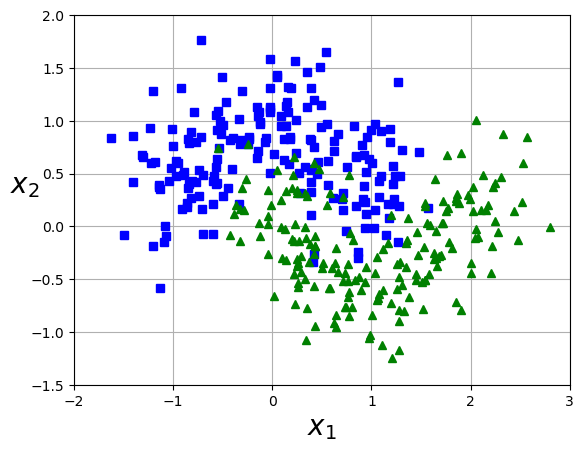

In [11]:
plot_data_set(X_train, y_train, [-2, 3, -1.5, 2])
plt.show

In [12]:
from matplotlib.colors import ListedColormap

def decision_boundaties(bag_clf, X, y, axes=[-2, 3, -1.5, 2], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[0], axes[1], 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = bag_clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    plt.contour(x1, x2, y_pred, alpha=0.8, cmap='Greys')
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0],'yo')
        plt.plot(X[:,0][y==1], X[:,1][y==1],'bs')
    plt.axis(axes)

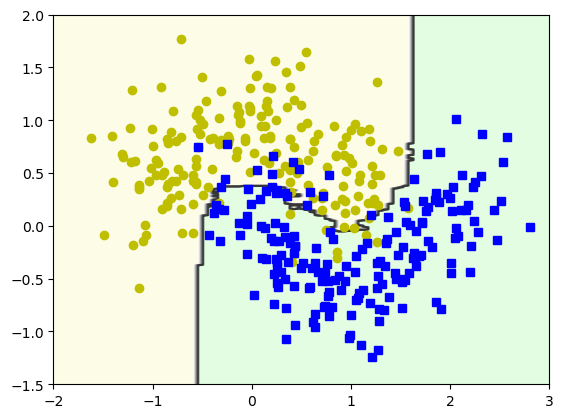

In [13]:
decision_boundaties(bag_clf, X_train, y_train)

In [14]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

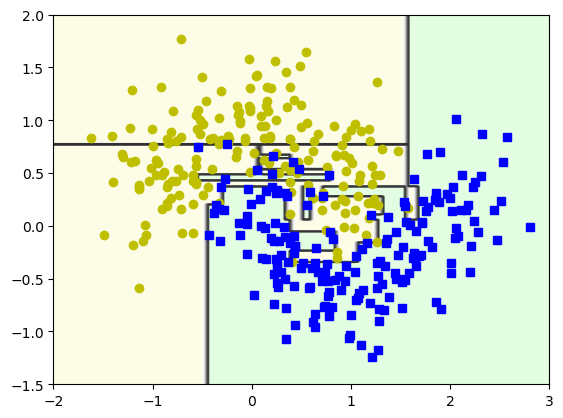

In [15]:
decision_boundaties(tree_clf, X_train, y_train)

### Out-of-Bag Evaluation

In [16]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(), n_estimators=500,
bootstrap=True, n_jobs=-1, oob_score=True) # set True for using oob

In [17]:
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

In [18]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.888

In [19]:
bag_clf.oob_decision_function_

array([[0.41      , 0.59      ],
       [0.34463277, 0.65536723],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.05617978, 0.94382022],
       [0.37209302, 0.62790698],
       [0.01578947, 0.98421053],
       [0.98404255, 0.01595745],
       [0.95294118, 0.04705882],
       [0.79166667, 0.20833333],
       [0.00537634, 0.99462366],
       [0.79047619, 0.20952381],
       [0.82386364, 0.17613636],
       [0.97142857, 0.02857143],
       [0.04395604, 0.95604396],
       [0.        , 1.        ],
       [0.98974359, 0.01025641],
       [0.96629213, 0.03370787],
       [0.98445596, 0.01554404],
       [0.02631579, 0.97368421],
       [0.40782123, 0.59217877],
       [0.88268156, 0.11731844],
       [1.        , 0.        ],
       [0.98086124, 0.01913876],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.65454545, 0.34545455],
       [0.

# Random Patches and Random Subspaces

# Random Forests

In [20]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [21]:
y_pred_rf = rnd_clf.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred_rf)

0.92

In [23]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(splitter='random', max_leaf_nodes=16), #max_samples: số lượng mẫu tố đa được sd
n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

In [24]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

### Extra-Trees

### Feature Importance

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
X = iris['data']
y = iris['target']

In [26]:
rnd_clf.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [27]:
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.1054630707099405
sepal width (cm) 0.02456775296651113
petal length (cm) 0.42421155315047476
petal width (cm) 0.4457576231730736


# Boosting

### AdaBoost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1, random_state = 42), n_estimators=200,
algorithm='SAMME.R', learning_rate=0.5)

In [29]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   learning_rate=0.5, n_estimators=200)

In [30]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.896

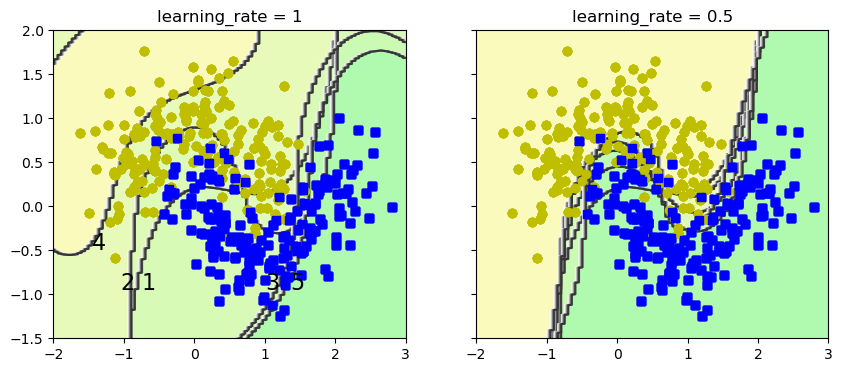

In [31]:
# extra code – this cell generates

m = len(X_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m) / m
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(C=0.2, gamma=0.6, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights * m)
        y_pred = svm_clf.predict(X_train)

        error_weights = sample_weights[y_pred != y_train].sum()
        r = error_weights / sample_weights.sum()  # equation 7-1
        alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
        sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
        sample_weights /= sample_weights.sum()  # normalization step

        decision_boundaties(svm_clf, X_train, y_train)
        plt.title(f"learning_rate = {learning_rate}")
    if subplot == 0:
        plt.text(-0.75, -0.95, "1", fontsize=16)
        plt.text(-1.05, -0.95, "2", fontsize=16)
        plt.text(1.0, -0.95, "3", fontsize=16)
        plt.text(-1.45, -0.5, "4", fontsize=16)
        plt.text(1.36,  -0.95, "5", fontsize=16)
    else:
        plt.ylabel("")

plt.show()

### Gradient Boosting

In [32]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

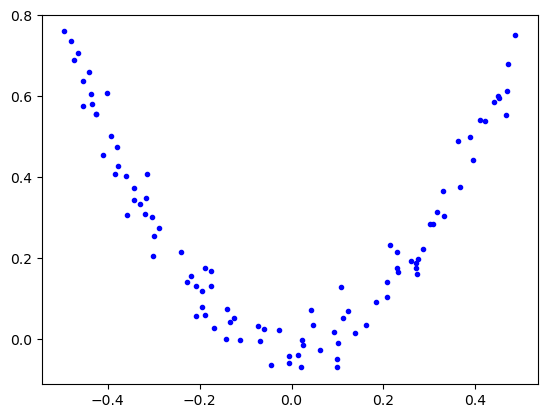

In [33]:
plt.plot(X, y, 'b.')

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [35]:
y2 = y - tree_reg1.predict(X)

In [36]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [37]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [38]:
X_new = np.array([[-0.4], [0.], [0.5]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.49484029, 0.04021166, 0.75026781])

In [39]:
def plot_predictions(regressors, X, y, axes, label=None,
                    data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1,1))
                for regressor in regressors)
    plt.plot(X[:, 0], y, 'b.', label=data_label)
    plt.plot(x1, y_pred, 'g-', linewidth=2, label=label)

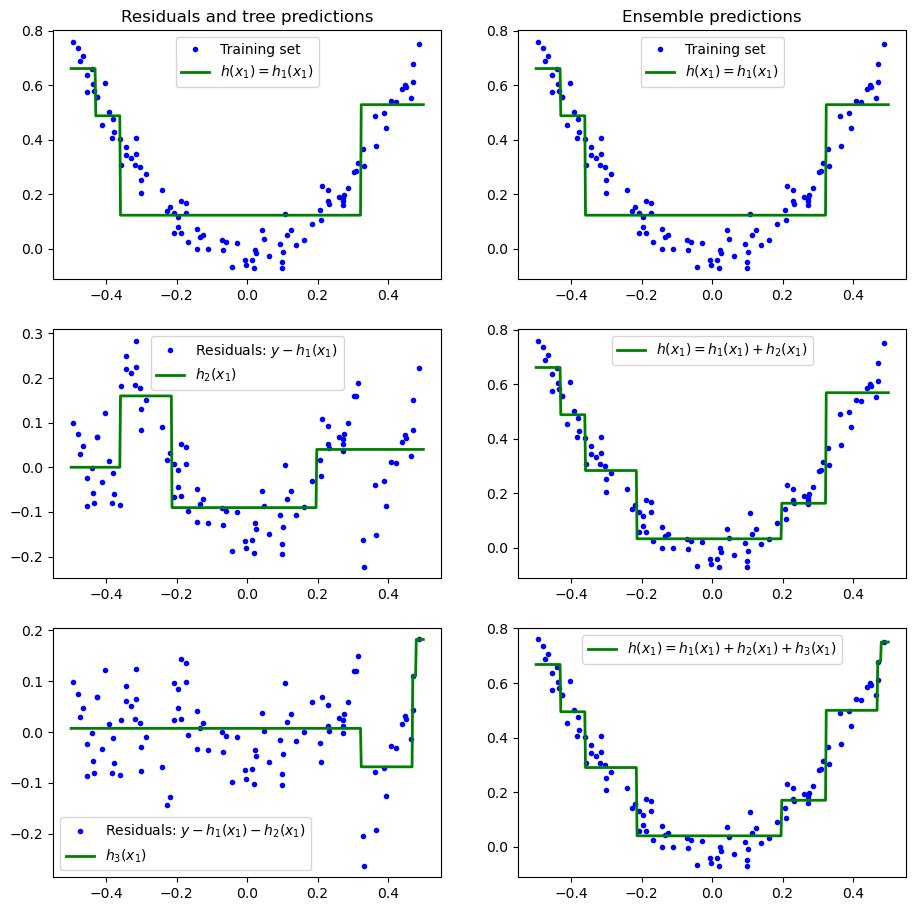

In [40]:
plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, [-0.5, 0.5, -0.2, 0.8],
                label='$h(x_1) = h_1(x_1)$', data_label='Training set')
plt.legend()
plt.title("Residuals and tree predictions")



plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, [-0.5, 0.5, -0.2, 0.8],
                label='$h(x_1) = h_1(x_1)$', data_label='Training set')
plt.legend()
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6],
                 label="$h_2(x_1)$",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.legend()

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                 label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.legend()

plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6],
                 label="$h_3(x_1)$",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.legend()

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8],
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.legend()

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [42]:
gbrt_best = GradientBoostingRegressor(max_depth=2, learning_rate=0.05, 
                                     n_estimators=500, n_iter_no_change=10,
                                     random_state=42)

gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [43]:
gbrt_best.n_estimators_

92

Text(0.5, 1.0, 'learning_rate=0.05, n_estimators=500')

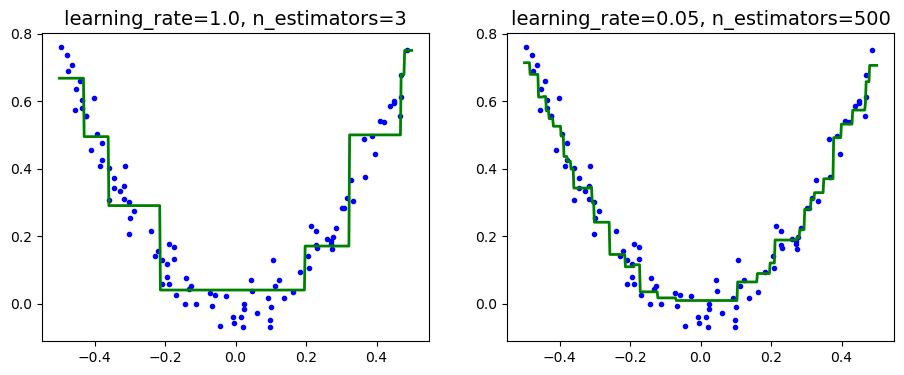

In [44]:
plt.figure(figsize=(11, 4))

plt.subplot(1, 2, 1)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label='Ensemble predictions')
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(1, 2, 2)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_best.learning_rate, gbrt_best.n_estimators), fontsize=14)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=120)

In [47]:
errors = [mean_squared_error(y_val, y_pred)
        for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

In [48]:
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=84)

In [49]:
min_error = np.min(errors)

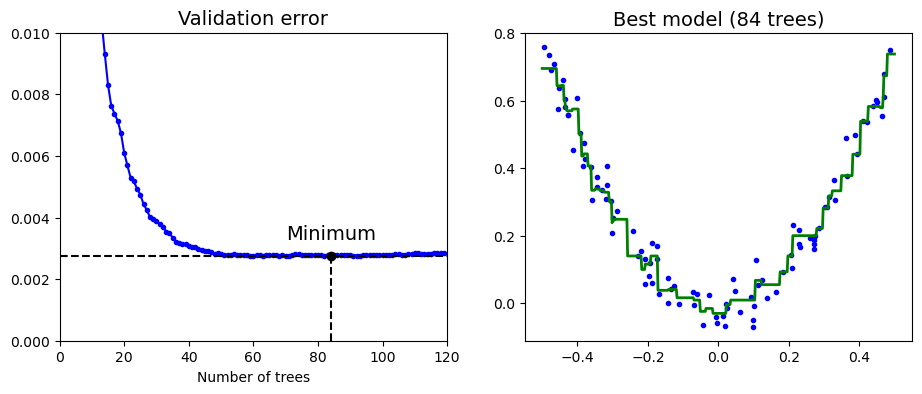

In [50]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

plt.show()

In [51]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [52]:
gbrt.n_estimators_, print('Minimum validation MSE: ', min_val_error)

Minimum validation MSE:  0.002750279033345716


(69, None)

# Stacking 

# Exercises


### Some Extra-function 

In [53]:
from scipy.stats import loguniform, uniform

a = loguniform(0, 10)

# 8

In [38]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [39]:
X_train, X_val, X_test, y_train, y_val, y_test = X[:50000], X[50000:60000], X[60000:], y[:50000], y[50000:60000], y[60000:]

In [40]:
for i in X_train, X_val, X_test, y_train, y_val, y_test:
    print(i.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [42]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
extra_tree_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm_clf = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [44]:
estimators = [rnd_clf, extra_tree_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(random_state=42)
Training the ExtraTreesClassifier(random_state=42)
Training the LinearSVC(max_iter=100, random_state=42, tol=20)
Training the MLPClassifier(random_state=42)


In [45]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9736, 0.9743, 0.8662, 0.9632]

In [84]:
from sklearn.ensemble import VotingClassifier

vot_clf = VotingClassifier(
estimators=[('rnd', rnd_clf), ('extra_tree_clf', extra_tree_clf), ('svm', svm_clf),
           ('mlp', mlp_clf)], voting='soft')

In [86]:
vot_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd', RandomForestClassifier(random_state=42)),
                             ('extra_tree_clf',
                              ExtraTreesClassifier(random_state=42)),
                             ('svm',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [87]:
from sklearn.metrics import accuracy_score
y_pred = vot_clf.predict(X_train)
accuracy_score(y_train, y_pred)

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [80]:
y_pred = vot_clf.predict(X_val)
accuracy_score(y_test, y_pred)

0.624

[0, 0, 0, 0, 0, 1, 1]


In [71]:
type(A[0]) != str and type(A[3]) != str

True